In [1]:
!pip install mtcnn
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# import libraries
import numpy as np
import cv2
import os
import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
def load_images(images_folder, img_size=(128, 128), scale=False):
    """
    Load images from a folder and return the image paths and array of images.

    Args:
        images_folder (str): Path to the folder containing the images.
        img_size (tuple, optional): Desired size for the images. Defaults to (128, 128).
        scale (bool, optional): Flag indicating whether to scale the images between 0 and 1. Defaults to False.

    Returns:
        image_path (list): List of image paths.
        images (ndarray): Array of loaded images.

    """
    # Store paths to images
    image_path = []
    for dirname, _, filenames in os.walk(images_folder):
        for filename in filenames:
            image_path.append(os.path.join(dirname, filename))

    print("There are {} images in {}".format(len(image_path), images_folder))

    # Load images and associated labels
    images = []

    for path in tqdm.tqdm(image_path):
        # Read image
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        img = np.array(img)

        images.append(img)

    images = np.array(images)

    if scale:
        images = images / 255  # scale between 0 and 1

    return image_path, images

In [6]:
!mkdir -p "/content/images_test"
!unrar x "/content/images_test.rar" "/content/images_test"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/images_test.rar

Extracting  /content/images_test/IMG20201223131039.jpg                    10%  OK 
Extracting  /content/images_test/IMG-20201219-WA0108.jpg                  12%  OK 
Extracting  /content/images_test/IMG-20201219-WA0107.jpg                  14%  OK 
Extracting  /content/images_test/IMG-20201219-WA0105.jpg                  16%  OK 
Extracting  /content/images_test/IMG-20201219-WA0106.jpg                  18%  OK 
Extracting  /content/images_test/IMG-20201219-WA0102.jpg                  20%  OK 
Extracting  /content/images_test/IMG-20201219-WA0103.jpg                  22%  OK 
Extracting  /content/images_test/IMG-20201219-WA0104.jpg                  24%  OK 
Extracting  /content/images_test/IMG-20201219-WA0101.jpg                  27%  OK 
Extracting  /content/images_test/IMG-20201219-WA0100.j

In [15]:
images_folder = "/content/images_test"
paths, images = load_images(images_folder,img_size = (512,512))

There are 60 images in /content/images_test


100%|██████████| 60/60 [00:01<00:00, 50.38it/s]
<ipython-input-5-ccd99773e724>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


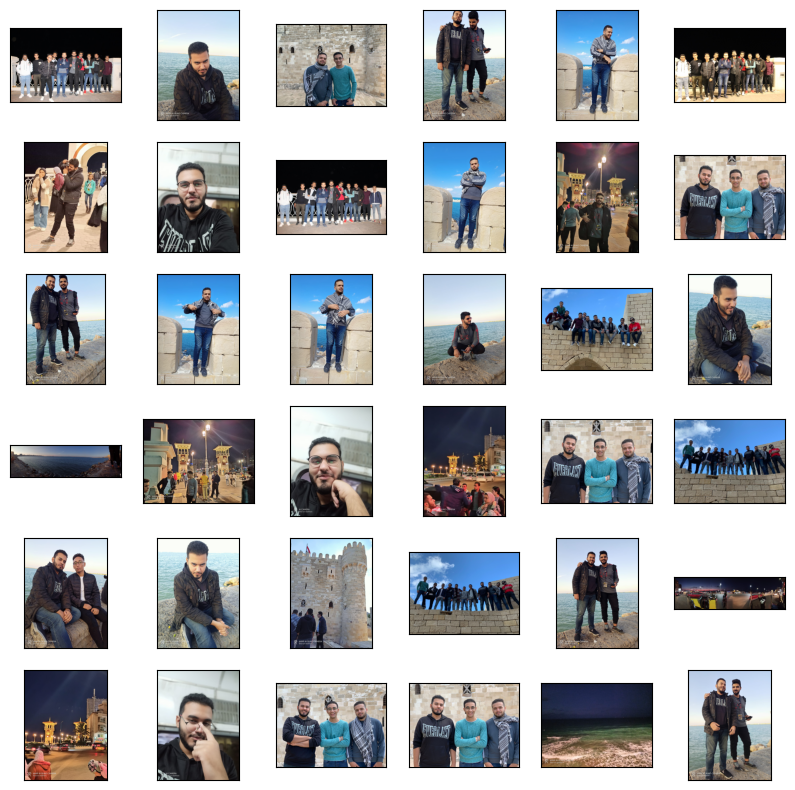

In [16]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(len(paths),36, replace=False)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(images[image_ind]), cmap=plt.cm.binary)

In [9]:
import mtcnn
print(mtcnn.__version__)

0.1.0


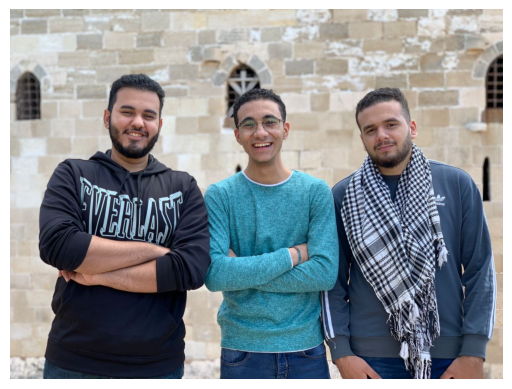

In [35]:
fig, ax = plt.subplots()
ax.imshow(images[32])
ax.axis('off')
plt.show()

In [36]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
img = images[32].copy()
faces = detector.detect_faces(img)
len(faces)

1/1 [==============================] - 0s 134ms/step


3

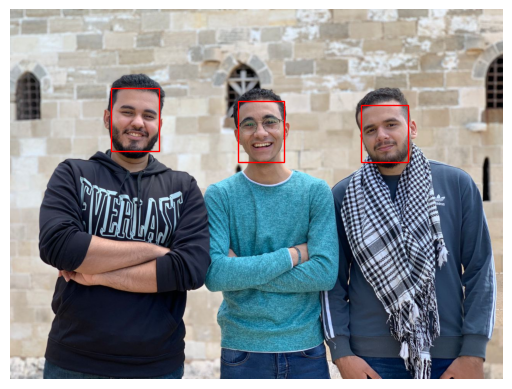

In [37]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
ax.axis('off')
plt.show()

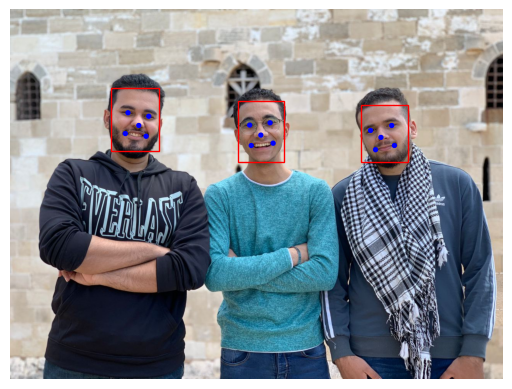

In [38]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

for face in faces:
    x,y,w,h = face['box']

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    # draw the dots
    for key, value in face['keypoints'].items():
        # create and draw dot
        dot = patches.Circle(value, radius=5, color='blue')
        ax.add_patch(dot)
ax.axis('off')
plt.show()

In [39]:
# draw each face separately
def draw_faces(img, result_list):
    """
    Draw each face separately from the result list on the image.

    Parameters:
    - img: The input image.
    - result_list: List of face detection results.
    """
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        # remove axis
        plt.axis('off')
        # plot face
        plt.imshow(img[y1:y2, x1:x2])
    # show the plot
    plt.show()

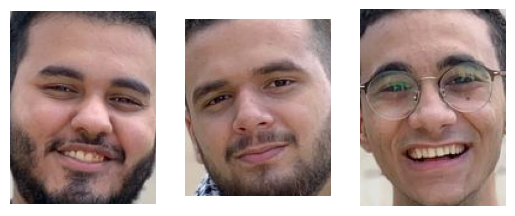

In [40]:
draw_faces(img, faces)

1/1 [==============================] - 0s 19ms/step


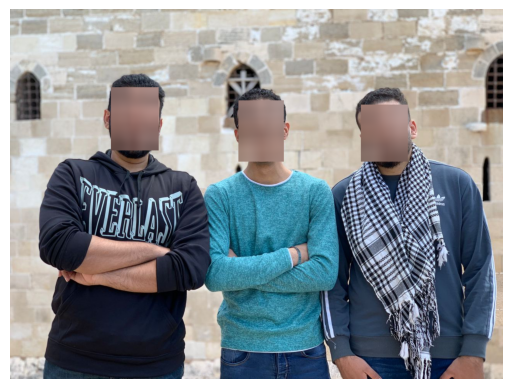

In [41]:
# Select an image
img = images[32].copy()

# Detect faces in the image
faces = detector.detect_faces(img)

# Create figure and axes
fig, ax = plt.subplots()

# Process each detected face
for face in faces:
    # Extract face bounding box coordinates
    x, y, w, h = face['box']

    # Extract the region of interest (ROI) containing the face
    roi = img[y:y+h, x:x+w]

    # Apply blurring to the ROI
    roi = cv2.blur(roi, (100, 100))

    # Impose the blurred ROI on the original image to get the final image
    img[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

# Display the final image with overlaid blurred faces
ax.imshow(img)

# Remove axis
plt.axis('off')

# Show the plot
plt.show()

In [42]:
# Create a VideoCapture object
cap = cv2.VideoCapture('video.mp4')

# Check if the video was opened successfully
if not cap.isOpened():
    raise Exception("Could not open video")

# Get the video's frame width, height, and frames per second (FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))

# Create an MTCNN detector object
detector = MTCNN()

# Process the video frame by frame
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we have reached the end of the video
    if not ret:
        break

    # Detect faces in the current frame
    faces = detector.detect_faces(frame)

    # Blur the detected faces
    for face in faces:
        x, y, w, h = face['box']
        roi = frame[y:y+h, x:x+w]
        roi = cv2.blur(roi, (100, 100))
        frame[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

    # Write the current frame to the output video
    out.write(frame)

    # # Display the current frame
    # cv2.imshow('Frame', frame)


# Release the VideoCapture and VideoWriter objects and destroy all windows
cap.release()
out.release()
# cv2.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step


In [43]:
from moviepy.editor import VideoFileClip, AudioFileClip

# Open the input video and extract its audio
input_video = VideoFileClip('/content/video.mp4')
input_audio = input_video.audio

# Open the output video (without audio)
output_video = VideoFileClip('output.mp4')

# Add the input audio to the output video
output_video = output_video.set_audio(input_audio)

# Write the final video (with audio) to a new file
output_video.write_videofile('final.mp4')

Moviepy - Building video final.mp4.
MoviePy - Writing audio in finalTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video final.mp4



Moviepy - Done !
Moviepy - video ready final.mp4
